# 크롬웹드라이버 다운로드

# https://chromedriver.storage.googleapis.com/index.html

크롬 웹드라이버를 다운로드하여 소스디렉터리에 압축해제하여
복사해준다. 

# 모듈 설치

In [1]:
from selenium import webdriver
import time

driver = webdriver.Chrome('chromedriver.exe')
driver.get('https://www.instagram.com')
time.sleep(2)

# 인스타 접속 URL 함수 생성

In [2]:
#%%writefile d:/python/insta_searching.py

def insta_searching(word) : 
    url = 'https://www.instagram.com/explore/tags/' + word
    return url

# 인스타에 자동로그인하기

In [3]:
email =  "bkj8797@gmail.com"
input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]
input_id.clear()
input_id.send_keys(email)

password =  "smart312!"
input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]
input_pw.clear()
input_pw.send_keys(password)
input_pw.submit()

### 정보저장 > 설정 등의 항목은 수동으로 설정한다.

In [4]:
word = "제주도맛집"
url = insta_searching(word)
driver.get(url)

# 첫번째 게시글 선택하기 : 함수 생성

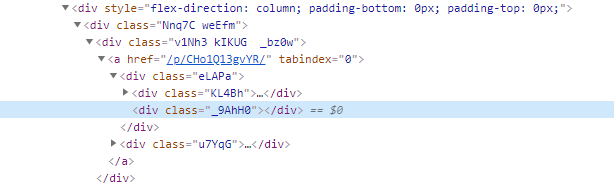

In [5]:
def select_first(driver) :
    first = driver.find_element_by_css_selector('div._9AhH0')
    first.click()
    time.sleep(3)

select_first(driver)

# 게시글 가져오기

In [6]:
import re
from bs4 import BeautifulSoup

def get_content(driver) :
    # 현재 페이지 정보 가져오기
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    # 본문 내용 가져오기 (예외처리)
    try :
        content = soup.select('div.C4VMK > span')[0].text
        
    except : 
        content = ' '
        
    # 해시태그 가져오기
    tags = re.findall(r'#[^\s#,\\]+', content)
    
    # 작성일자 가져오기
    date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]
    
    # 좋아여 숫자 가져오기
    try :
        like = soup.select('div.Nm9Fw > button')[0].text[4:-1]
        
    except :
        like = 0
        
    # 위치정보 가져오기
    try :
        place = soup.select('div.M30cS')[0].text
        
    except :
        place = ''
        
    # 현재 수집한 정보를 저장하기
    data = [content, date, like, place, tags]
    
    return data

get_content(driver)

['(광고)제주도민들도 극찬한 #운정이네.중문에 위치한 아주아주 귀한맛집!제주 향토음식점 운정이네 에서맛있는 식사도하고 제주를 온몸으로 느껴보는건 어떨까요?🌴🌴🌴🌴..✔️Am8:00시 빠른오픈으로 아침식사가능!제주하면 빠질수없는 제주갈치!운정이네 에서 재대로 즐겨보세요♥️.비주얼,양,맛까지 모두 사로잡은 운정이네 👍🏼(식사후엔 디저트로 커피,아이스크림까지🖤).운정이네제주 서귀포시 중간서로 726(지번) 1239-5🕰8:00~22:00문의:  064-738-3883...#제주도맛집#제주갈치조림맛집#제주도갈치조림#서귀포갈치조림#중문갈치조림#제주갈치구이#제주도갈치조림맛집#서귀포갈치조림맛집#제주통갈치조림#제주통갈치구이',
 '2020-11-17',
 0,
 '',
 ['#운정이네.중문에',
  '#제주도맛집',
  '#제주갈치조림맛집',
  '#제주도갈치조림',
  '#서귀포갈치조림',
  '#중문갈치조림',
  '#제주갈치구이',
  '#제주도갈치조림맛집',
  '#서귀포갈치조림맛집',
  '#제주통갈치조림',
  '#제주통갈치구이']]

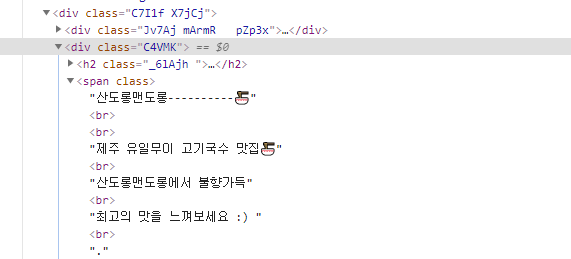

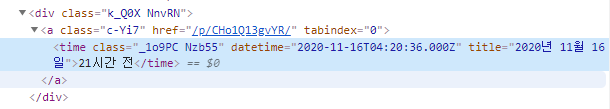

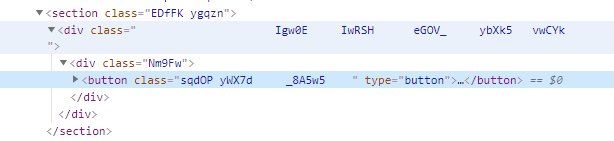

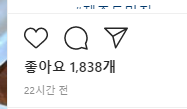

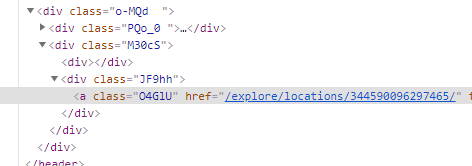

# 다음 게시글 열기 : 함수 생성

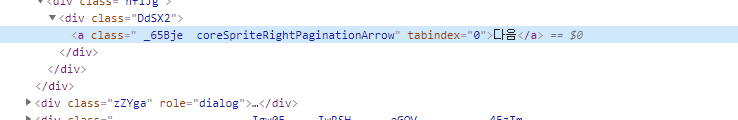

In [7]:
def move_next(driver) :
    right = driver.find_element_by_css_selector('a.coreSpriteRightPaginationArrow')
    right.click()
    time.sleep(3)
    
move_next(driver)

# 인스타그램 정보 수집하기

In [8]:
#%%writefile d:/python/insta_1.py    

from selenium import webdriver
from bs4 import BeautifulSoup
import time
import re

# 웹드라이버 열기
driver = webdriver.Chrome('chromedriver.exe')

# 인스타그램 접속후 자동로그인하기
driver.get('https://www.instagram.com')
time.sleep(2)

email =  "bkj8797@gmail.com"
input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]
input_id.clear()
input_id.send_keys(email)

password =  "smart312!"
input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]
input_pw.clear()
input_pw.send_keys(password)
input_pw.submit()

# 인스타 크롤링하기

In [9]:
# 접속 URL 생성
word = "제주도맛집"
url = insta_searching(word)

# 인스타검색페이지 접속하기
driver.get(url)
time.sleep(3)

# 첫번째 게시글 선택
select_first(driver)

# 데이터 저장 변수의 초기화
results = []

# 크롤링 게시글수 지정
target = 50

# 지정된 게시글수만큼 정보 수집
for i in range(target) :
	# 게시글 수집
	try :
		data = get_content(driver)
		results.append(data)
		move_next(driver)

	except :
		time.sleep(2)
		move_next(driver)
    
print(results[:2])

[['(광고)제주도민들도 극찬한 #운정이네.중문에 위치한 아주아주 귀한맛집!제주 향토음식점 운정이네 에서맛있는 식사도하고 제주를 온몸으로 느껴보는건 어떨까요?🌴🌴🌴🌴..✔️Am8:00시 빠른오픈으로 아침식사가능!제주하면 빠질수없는 제주갈치!운정이네 에서 재대로 즐겨보세요♥️.비주얼,양,맛까지 모두 사로잡은 운정이네 👍🏼(식사후엔 디저트로 커피,아이스크림까지🖤).운정이네제주 서귀포시 중간서로 726(지번) 1239-5🕰8:00~22:00문의:  064-738-3883...#제주도맛집#제주갈치조림맛집#제주도갈치조림#서귀포갈치조림#중문갈치조림#제주갈치구이#제주도갈치조림맛집#서귀포갈치조림맛집#제주통갈치조림#제주통갈치구이', '2020-11-17', 0, '', ['#운정이네.중문에', '#제주도맛집', '#제주갈치조림맛집', '#제주도갈치조림', '#서귀포갈치조림', '#중문갈치조림', '#제주갈치구이', '#제주도갈치조림맛집', '#서귀포갈치조림맛집', '#제주통갈치조림', '#제주통갈치구이']], ['(광고)제주도 찐맛집 기행 💚🌴🌴🌴“ 돈짬” 에서 퓨전짬뽕 어때

# 수집된 정보 저장하기

In [ ]:
!pip install pandas

# 엑셀관련 모듈 설치

In [ ]:
!pip install xlrd

In [ ]:
!pip install xlwt

In [ ]:
!pip install xlsxwriter

In [ ]:
!pip install matplotlib

In [14]:
import pandas as pd
             
results_df = pd.DataFrame(results)

results_df.columns = ['content', 'data', 'like', 'place', 'tags']

results_df.to_excel('insta_jeju_Matjip.xlsx', index=False)

In [15]:
pd.read_excel('insta_jeju_Matjip.xlsx')

,content,data,like,place,tags
0,(광고)제주도민들도 극찬한 #운정이네.주...,2020-11-17,0,NaN,"['#운정이네.중문에', '#제주도맛집', '#제..."
1,(광고)제주도 찐맛집 기행 💚🌴🌴🌴“ 돈짬” 에...,2020-11-17,0,NaN,"['#제주도맛집', '#제주맛집', '#제주맛집ᄎ..."
2,산도롱맨도롱----------🍜제주 유일무이 고기국수 맛집🍜제주 여행간 빠지면 섭섭...,2020-11-18,0,NaN,"['#제주도맛집', '#제주맛집', '#제주도고기국수', '#성산일출봉맛집', '#..."
3,<광고>#산도롱맨도롱 🍜 갈비국수는 흑돼지 생갈비로 만든 국수이고 두 종류입니다1....,2020-11-17,0,NaN,"['#산도롱맨도롱', '#성산맛집', '#종달리맛집', '#구좌맛집', '#함덕맛집..."
4,(광고)지만 진심으로 추천해주고싶은 맛집정보!⠀하와이에 온 것 같은~😍뷰가 대~박이...,2020-11-17,0,NaN,"['#제주맛집', '#제주도맛집', '#맛집속제주', '#금오름', '#제주관광지도..."
5,해물도 가득한 갈치조림맛집<형제도식당>⠀입이 떡! 벌어지는 1미터 짜리갈치조림!! ...,2020-11-17,0,NaN,"['#서귀포맛집', '#제주중문맛집', '#중문맛집', '#제주도맛집', '#제주맛..."
6,<광고>쌀쌀한 가을날씨에는 따끈한 국물이 최고💕 모물모물은 산도롱맨도롱 혜자 갈비탕...,2020-11-17,"1,736",NaN,"['#산도롱맨도롱', '#제주맛집', '#제주도맛집', '#월정리맛집', '#성산맛..."
7,"(광고)제주도맛집 검색하다 찾은 대박맛집!.제주도 ""오전 열한시"".다른분께서 리뷰하...",2020-11-18,0,NaN,"['#중문맛집', '#서귀포맛집', '#제주도맛집', '#제주맛집', '#산방산맛집..."
8,.바다를 안고 살아오신 어머니의 한평생을 이어받아 제주의 좋은것만 모아 그맛 지키려...,2020-11-17,0,gozip_hamdeok,"['#고집돌우럭', '#함덕맛집', '#해녀고집']"
9,"❤넓은 주차장 (가게 앞, 뒤)❤단체환영❤포장가능❤쾌적하고 깔끔한 매장❤도민이 인정...",2020-11-18,NaN,NaN,"['#큰집어멍', '#중문아침식사', '#제주신라호텔맛집', '#제주여행', '#중..."


# 워드클라우드 

In [18]:
import pandas as pd

raw_total = pd.read_excel('insta_jeju_Matjip.xlsx')

raw_total['tags'][:5]

0    ['#운정이네.중문에', '#제주도맛집', '#제...
1    ['#제주도맛집', '#제주맛집', '#제주맛집ᄎ...
2    ['#제주도맛집', '#제주맛집', '#제주도고기국수', '#성산일출봉맛집', '#...
3    ['#산도롱맨도롱', '#성산맛집', '#종달리맛집', '#구좌맛집', '#함덕맛집...
4    ['#제주맛집', '#제주도맛집', '#맛집속제주', '#금오름', '#제주관광지도...
Name: tags, dtype: object

In [19]:
tags_total = []

for tags in raw_total['tags'] :
	tags_list = tags[2:-2].split("', '")
	for tag in tags_list :
		tags_total.append(tag)

tags_total

['#운정이네.중문에',
 '#제주도맛집',
 '#제주갈치조림맛집',
 '#제주도갈치조림',
 '#서귀포갈치조림',
 '#중문갈치조림',
 '#제주갈치구이',
 '#제주도갈치조림맛집',
 '#서귀포갈치조림맛집',
 '#제주통갈치조림',
 '#제주통갈치구이',
 '#제주도맛집',
 '#제주맛집',
 '#제주맛집추천',
 '#제주도맛집추천',
 '#노형동맛집',
 '#노형맛집',
 '#제주노형맛집',
 '#제주도가족식사',
 '#제주도민맛집',
 '#제주공항맛집',
 '#제주공항근처맛집',
 '#제주짬뽕',
 '#제주짬뽕맛집',
 '#제주도맛집',
 '#제주맛집',
 '#제주도고기국수',
 '#성산일출봉맛집',
 '#광치기해변맛집',
 '#제주먹방',
 '#제주서귀포맛집',
 '#산도롱맨도롱',
 '#성산맛집',
 '#종달리맛집',
 '#구좌맛집',
 '#함덕맛집',
 '#애월맛집',
 '#중문맛집',
 '#서귀포맛집',
 '#제주맛집',
 '#제주도맛집',
 '#제주고기국수맛집',
 '#제주아침식사',
 '#지미봉',
 '#세화맛집',
 '#김녕맛집',
 '#제주여행',
 '#제주맛집',
 '#제주도맛집',
 '#맛집속제주',
 '#금오름',
 '#제주관광지도',
 '#제주포토존',
 '#제주인생맛집',
 '#제주인생포토존',
 '#제주핫플레이스',
 '#제주핫플',
 '#서귀포맛집',
 '#제주중문맛집',
 '#중문맛집',
 '#제주도맛집',
 '#제주맛집',
 '#제주도여행',
 '#제주가볼만한곳',
 '#중문갈치조림맛집',
 '#서귀포갈치조림맛집',
 '#중문관광

# 해시태그 빈도수 카운트하기

In [20]:
from collections import Counter

tag_counts = Counter(tags_total)

In [21]:
tag_counts.most_common(30)

[('#제주도맛집', 36),
 ('#제주맛집', 20),
 ('#애월맛집', 19),
 ('#한림맛집', 17),
 ('#제주여행', 16),
 ('#서귀포맛집', 15),
 ('#중문맛집', 13),
 ('#제주브런치맛집', 12),
 ('#협재맛집', 11),
 ('#산방산맛집', 8),
 ('#애월핫플', 8),
 ('#애월카페', 8),
 ('#오설록맛집', 8),
 ('#한경면맛집', 8),
 ('#맛스타그램', 8),
 ('#먹스타그램', 8),
 ('#제주핫플', 7),
 ('#제주도여행', 7),
 ('#오설록', 7),
 ('#오설록티뮤지엄', 7),
 ('#제주영어교육도시', 7),
 ('#선팔', 7),
 ('#저지리맛집', 7),
 ('#송악산', 7),
 ('#제주국제학교', 7),
 ('#제주신화월드', 7),
 ('#일상', 7),
 ('#모슬포맛집', 7),
 ('#협재해수욕장', 7),
 ('#소통', 7)]

# 불용어처리 : 상관없는 값 제거하기

# STOPWORDS

In [22]:
STOPWORDS = ['#혼커', '#제주맛집', '#한림카페', '#한림핫플', 
            '#애월카페', '#애월핫플', '#제주공항맛집',]

tag_total_selected = []

for tag in tags_total :
    if tag not in STOPWORDS :
        tag_total_selected.append(tag)
    
tag_counts_selected = Counter(tag_total_selected)
tag_counts_selected.most_common(15)

[('#제주도맛집', 36),
 ('#애월맛집', 19),
 ('#한림맛집', 17),
 ('#제주여행', 16),
 ('#서귀포맛집', 15),
 ('#중문맛집', 13),
 ('#제주브런치맛집', 12),
 ('#협재맛집', 11),
 ('#산방산맛집', 8),
 ('#오설록맛집', 8),
 ('#한경면맛집', 8),
 ('#맛스타그램', 8),
 ('#먹스타그램', 8),
 ('#제주핫플', 7),
 ('#제주도여행', 7)]

In [ ]:
!pip install seaborn

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import sys

if sys.platform in ["win32", "win64"]:
    font_name = "malgun gothic"
elif sys.platform == "darwin":
    font_name = "AppleGothic"

rc('font',family=font_name)


# 시각화 데이터 준비

In [24]:
tag_counts_df = pd.DataFrame(tag_counts_selected.most_common(30))
tag_counts_df.columns = ['tags', 'counts']

# 막대 그래프 

<AxesSubplot:xlabel='counts', ylabel='tags'>

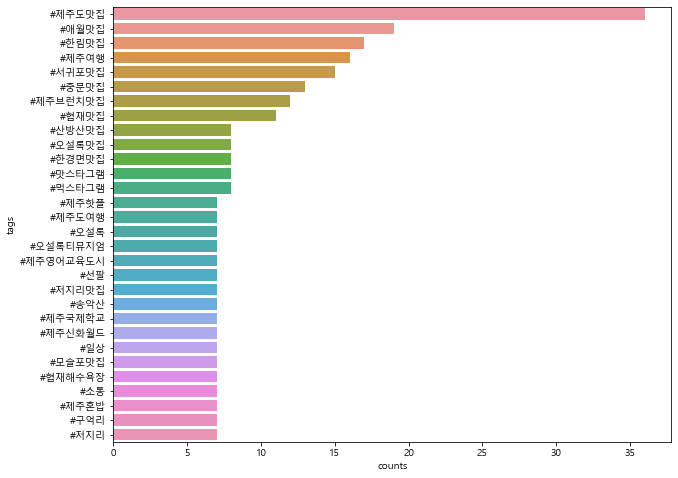

In [25]:
plt.figure(figsize=(10,8)) 
sns.barplot(x='counts', y='tags', data = tag_counts_df)

# 워드클라우드

In [27]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import platform

if platform.system() == 'Windows':   #윈도우의 경우
    font_path = "c:/Windows/Fonts/malgun.ttf"
elif platform.system() == "Darwin":   #Mac 의 경우
    font_path = "/Users/$USER/Library/Fonts/AppleGothic.ttf"

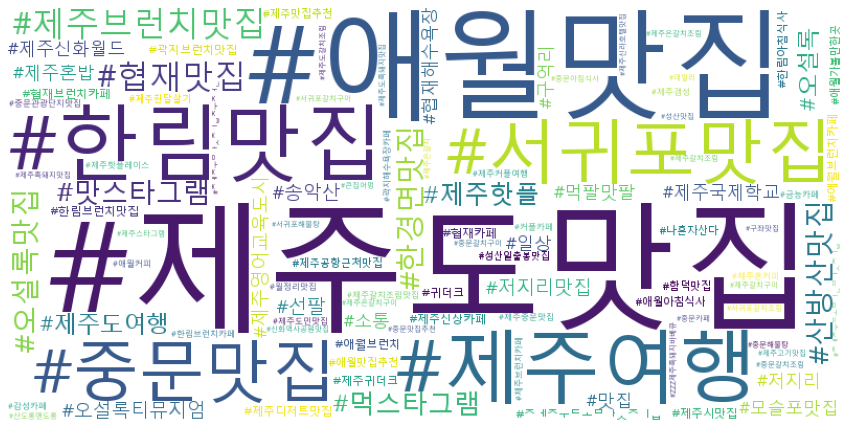

In [28]:
wordcloud=WordCloud(font_path= font_path, 
                    background_color="white",
                    max_words=100,
                    relative_scaling= 0.3,
                    width = 800,
                    height = 400
                 ).generate_from_frequencies(tag_counts_selected)  
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('insta_jeju_Matjip.png')  

In [29]:
import pandas as pd
raw_total = pd.read_excel('insta_jeju_Matjip.xlsx')

#head()함수는 괄호안에 값(숫자)를 입력하지 않으면 기본으로 5줄만 출력한다.
#head() <==> tail()
#head(3) 하면 3줄만 보임
raw_total.head()

,content,data,like,place,tags
0,(광고)제주도민들도 극찬한 #운정이네.주...,2020-11-17,0,NaN,"['#운정이네.중문에', '#제주도맛집', '#제..."
1,(광고)제주도 찐맛집 기행 💚🌴🌴🌴“ 돈짬” 에...,2020-11-17,0,NaN,"['#제주도맛집', '#제주맛집', '#제주맛집ᄎ..."
2,산도롱맨도롱----------🍜제주 유일무이 고기국수 맛집🍜제주 여행간 빠지면 섭섭...,2020-11-18,0,NaN,"['#제주도맛집', '#제주맛집', '#제주도고기국수', '#성산일출봉맛집', '#..."
3,<광고>#산도롱맨도롱 🍜 갈비국수는 흑돼지 생갈비로 만든 국수이고 두 종류입니다1....,2020-11-17,0,NaN,"['#산도롱맨도롱', '#성산맛집', '#종달리맛집', '#구좌맛집', '#함덕맛집..."
4,(광고)지만 진심으로 추천해주고싶은 맛집정보!⠀하와이에 온 것 같은~😍뷰가 대~박이...,2020-11-17,0,NaN,"['#제주맛집', '#제주도맛집', '#맛집속제주', '#금오름', '#제주관광지도..."


In [30]:
location_counts = raw_total['place'].value_counts()
location_counts

천연불맛 불쇼 미온당      7
제주귀더크            4
제주 협재 해수욕장       1
한담해안산책로          1
gozip_hamdeok    1
자연으로             1
월정리해변            1
Jeju             1
제주도 애월읍          1
사이카레             1
안녕협재씨            1
구엄리돌염전           1
운정이네 중문          1
제주도              1
사계 해변            1
Name: place, dtype: int64

In [31]:
location_counts_df = pd.DataFrame(location_counts)
location_counts_df.head()

,place
천연불맛 불쇼 미온당,7
제주귀더크,4
제주 협재 해수욕장,1
한담해안산책로,1
gozip_hamdeok,1


# 엑셀파일로 저장

In [33]:
location_counts_df.to_excel('location_counts.xlsx')

In [35]:
locations = list(location_counts.index)
locations

['천연불맛 불쇼 미온당',
 '제주귀더크',
 '제주 협재 해수욕장',
 '한담해안산책로',
 'gozip_hamdeok',
 '자연으로',
 '월정리해변',
 'Jeju',
 '제주도 애월읍',
 '사이카레',
 '안녕협재씨',
 '구엄리돌염전',
 '운정이네 중문',
 '제주도',
 '사계 해변']

# 카카오 API 활용 예제

In [38]:
import requests

searching = '경포대'

url = "https://dapi.kakao.com/v2/local/search/keyword.json?query={}".format(searching)

headers = {"Authorization" : "KakaoAK b6d94e227d5e7dd8c991c87cb6f07781"}

places = requests.get(url, headers=headers).json()['documents']
places

[{'address_name': '강원 강릉시 저동 94',
  'category_group_code': '',
  'category_group_name': '',
  'category_name': '여행 > 관광,명소 > 문화유적',
  'distance': '',
  'id': '10158575',
  'phone': '033-640-4471',
  'place_name': '경포대',
  'place_url': 'http://place.map.kakao.com/10158575',
  'road_address_name': '강원 강릉시 경포로 365',
  'x': '128.896636344738',
  'y': '37.7950741626953'},
 {'address_name': '강원 강릉시 저동 93-2',
  'category_group_code': 'PK6',
  'category_group_name': '주차장',
  'category_name': '교통,수송 > 교통시설 > 주차장 > 공영주차장',
  'distance': '',
  'id': '20513150',
  'phone': '',
  'place_name': '경포대주차장',
  'place_url': 'http://place.map.kakao.com/20513150',
  'road_address_name': '',
  'x': '128.896835802764',
  'y': '37.7955934358392'},
 {'address_name': '강원 강릉시 강문동 산 1',
  'category_group_code': 'AT4',
  'category_group_name': '관광명소',
  'category_name': '여행 > 관광,명소 > 해수욕장,해변',
  'distance': '',
  'id': '8199114',
  'phone': '033-640-4533',
  'place_name': '경포해변',
  'place_url': 'http://place.map.k

In [47]:
def find_places(searching) :
	# 접속 URL 생성
	url = "https://dapi.kakao.com/v2/local/search/keyword.json?query={}".format(searching)
	# 헤더 생성
	headers = {"Authorization" : "KakaoAK d4a9f679383f73a88a2fa5679fcc6154"}
	# API 요청 & 정보 받기
	places = requests.get(url, headers=headers).json()['documents']
	# 필요한 정보 추출
	place=places[0]
	name = place['place_name']
	lng = place['x']	#lng 위도
	lat = place['y']	#lat 경도

	data = [name, lng, lat, searching]
	
	return data

# 함수 테스트

In [48]:
data = find_places('경포대')
data

['경포대', '128.896636344738', '37.7950741626953', '경포대']

In [49]:
import time
from tqdm.notebook import tqdm

locations_inform = []

for location in tqdm(locations) :
	try :
		data = find_places(location)
		locations_inform.append(data)
	except :
		pass

locations_inform

[['귀더크', '126.282366800118', '33.4423007490057', '제주귀더크'],
 ['협재해수욕장', '126.239157539085', '33.3938660776221', '제주 협재 해수욕장'],
 ['한담해안산책로', '126.310468326159', '33.4593234504188', '한담해안산책로'],
 ['자연으로', '126.66472220005421', '37.4127361352499', '자연으로'],
 ['월정리해수욕장', '126.795805057888', '33.556469394054', '월정리해변'],
 ['Jeju in aA', '126.83650369902168', '33.53833652360498', 'Jeju'],
 ['올레길 17코스(광령-제주원도심 올레)', '126.439341083568', '33.4608856490895', '제주도 애월읍'],
 ['사이카레', '126.381106668339', '33.4842446359284', '사이카레'],
 ['안녕협재씨', '126.2453300552408', '33.39898331799428', '안녕협재씨'],
 ['돌염전', '126.37652048642', '33.4834138275298', '구엄리돌염전'],
 ['운정이네 본점', '126.437754696081', '33.2635455050256', '운정이네 중문'],
 ['제주도', '126.545875710283', '33.3797769227161', '제주도'],
 ['사계해변', '126.3085978558', '33.2286582703756', '사계 해변']]

In [50]:
locations_inform_df = pd.DataFrame(locations_inform)
locations_inform_df.columns = ['name_official', '경도', '위도', '인스타위치명']
locations_inform_df.to_excel('location.xlsx', index=False)

In [51]:
location_counts_df = pd.read_excel('location_counts.xlsx', index_col = 0)
location_inform_df = pd.read_excel('locations.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: 'locations.xlsx'

In [64]:
location_data = pd.merge(locations_inform_df, location_counts_df, how = 'inner', left_on = 'name_official', right_index=True)
location_data

,name_official,경도,위도,인스타위치명,place
2,한담해안산책로,126.310468326159,33.4593234504188,한담해안산책로,1
3,자연으로,126.66472220005421,37.4127361352499,자연으로,1
7,사이카레,126.381106668339,33.4842446359284,사이카레,1
8,안녕협재씨,126.2453300552408,33.39898331799428,안녕협재씨,1
11,제주도,126.545875710283,33.3797769227161,제주도,1


In [65]:
location_data = location_data.pivot_table(index=['name_official', '경도', '위도'], values='place', aggfunc = 'sum')
location_data

,,,place
name_official,경도,위도,
사이카레,126.381106668339,33.4842446359284,1
안녕협재씨,126.2453300552408,33.39898331799428,1
자연으로,126.66472220005421,37.4127361352499,1
제주도,126.545875710283,33.3797769227161,1
한담해안산책로,126.310468326159,33.4593234504188,1


In [55]:
location_data.to_excel('location_inform.xlsx')

location_data = pd.read_excel('location_inform.xlsx')

location_data

,Unnamed: 0,name_official,경도,위도,place
0,0,사이카레,126.381107,33.484245,1
1,1,안녕협재씨,126.245330,33.398983,1
2,2,자연으로,126.664722,37.412736,1
3,3,제주도,126.545876,33.379777,1
4,4,한담해안산책로,126.310468,33.459323,1


In [56]:
!pip install folium

In [62]:
import folium
Mt_Hanla = [33.362500, 126.533694]
map_jeju = folium.Map(location = Mt_Hanla, zoom_start = 11)

for i in range(len(location_data)) :
	name = location_data['name_official'][i]
	count = location_data['place'][i]
	size = int(count) * 2
	lat = float(location_data['위도'][i])
	long = float(location_data['경도'][i])

	folium.CircleMarker((lat, long), radius = size, color = 'gray', popup = name).add_to(map_jeju)

map_jeju

In [63]:
map_jeju.save('jeju.html')